In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient
import datetime

In [2]:
timeSeriesData = pd.DataFrame(columns=['symbol','date','cur_price','trade_quantity','updown_rate'])

In [3]:
client = MongoClient('mongodb://127.0.0.1:27017/')
db = client['mph']
# print(db)
collection_price = db['crypto_prices']

In [4]:
price_data = collection_price.find({'symbol':'BNB'})

In [5]:
index = 0

for price_detail in price_data:
    timeSeriesData.loc[index, 'symbol'] = price_detail['symbol']
    timeSeriesData.loc[index,'date']= price_detail['date']
    timeSeriesData.loc[index, 'cur_price'] = price_detail['cur_price']
    timeSeriesData.loc[index, 'trade_quantity'] = price_detail['trade_quantity']/500000 # OMG Normalization
    timeSeriesData.loc[index, 'updown_rate'] = price_detail['updown_rate']
    index+=1

In [6]:
timeSeriesData = timeSeriesData.sort_values(['date'])

In [7]:
startDate1 = "2018-03-02"
endDate1 = "2019-12-04"

startDate = datetime.datetime.strptime(startDate1,"%Y-%m-%d")
endDate = datetime.datetime.strptime(endDate1,"%Y-%m-%d")

In [8]:
monthDate = startDate +pd.DateOffset(months=3)

In [9]:
timeSeriesData1 = timeSeriesData.loc[(timeSeriesData['date'] >= startDate) & (timeSeriesData['date'] <= endDate), :]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


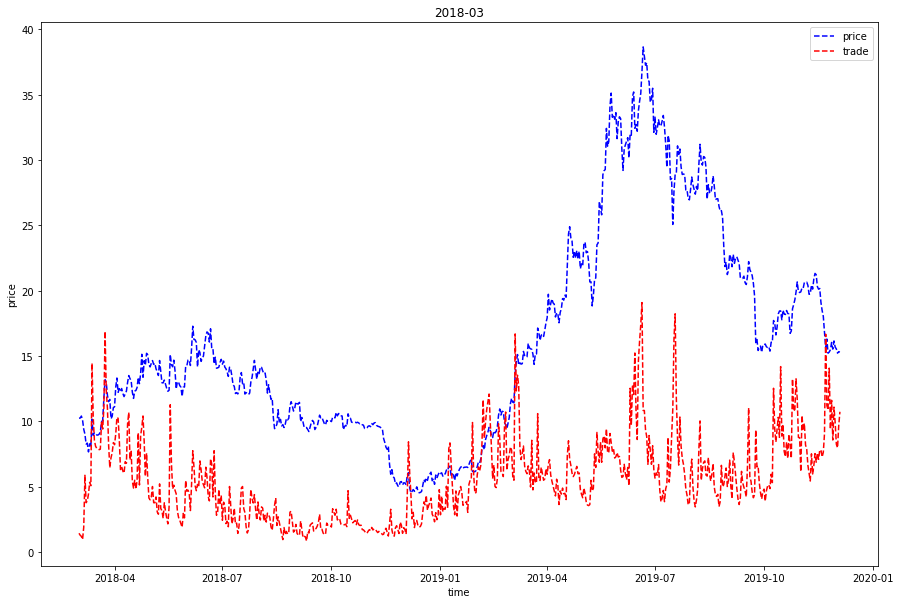

In [10]:
plt.figure(figsize=(15,10))
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['cur_price'].values,'b--')
#plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['count'].values, 'ro')
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['trade_quantity'].values, 'r--')
plt.title(startDate.strftime('%Y-%m'))
plt.xlabel('time')
plt.ylabel('price')
plt.legend(['price','trade','downhill'])
plt.show()

In [16]:
total=pd.concat([timeSeriesData1[['cur_price']],timeSeriesData1[['trade_quantity']]],1)
total

,cur_price,trade_quantity
642,10.232,1.42066
641,10.2393,1.2707
640,10.3935,1.1844
639,10.0911,0.9415
638,9.3872,1.88114
...,...,...
4,15.677,9.9
3,15.5309,8.24
2,15.2112,7.96
1,15.3207,9.64


In [20]:
def histogram_intersection(a, b):
        v = np.minimum(a, b).sum().round(decimals=1)
        return v

#pd.scatter_matrix(total)
total.corr(method=histogram_intersection)

""


In [22]:
total.dtypes

cur_price         object
trade_quantity    object
dtype: object

In [23]:
total['cur_price'] = pd.to_numeric(total['cur_price'], errors='coerce')

In [24]:
total['trade_quantity'] = pd.to_numeric(total['trade_quantity'], errors='coerce')

In [25]:
total.corr()

,cur_price,trade_quantity
cur_price,1.000000,0.440733
trade_quantity,0.440733,1.000000
